In [1]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import zipfile

In [2]:
zip_ref = zipfile.ZipFile("full_CNN_train.p.zip", 'r')
zip_ref.extractall("extracted")
zip_ref.close()

In [3]:
try:
    with open('extracted/full_CNN_train.p', 'rb') as file:
        data = pickle.load(file)
    print("Pickle file is valid and loaded successfully.")
except (pickle.UnpicklingError, EOFError, ImportError, IndexError) as e:
    print("Pickle file is corrupted or invalid:", e)


Pickle file is valid and loaded successfully.


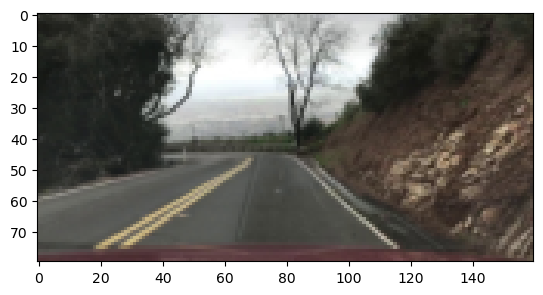

In [4]:
with open("extracted/full_CNN_train.p", 'rb') as file:
    loaded_data = pickle.load(file)

plt.imshow(loaded_data[1000])
#print(loaded_data[1])

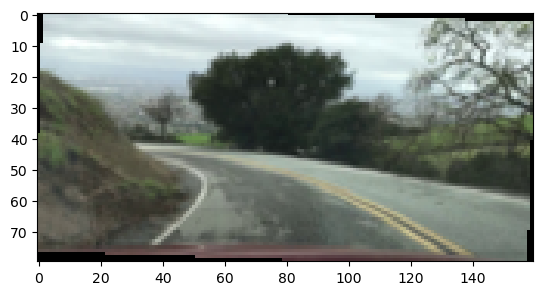

In [5]:
plt.imshow(loaded_data[12763])

In [6]:
zip_ref = zipfile.ZipFile("full_CNN_labels.p.zip", 'r')
zip_ref.extractall("extracted2")
zip_ref.close()

In [7]:
try:
    with open('extracted2/full_CNN_labels.p', 'rb') as file:
        data2 = pickle.load(file)
    print("Pickle file is valid and loaded successfully.")
except (pickle.UnpicklingError, EOFError, ImportError, IndexError) as e:
    print("Pickle file is corrupted or invalid:", e)

Pickle file is valid and loaded successfully.


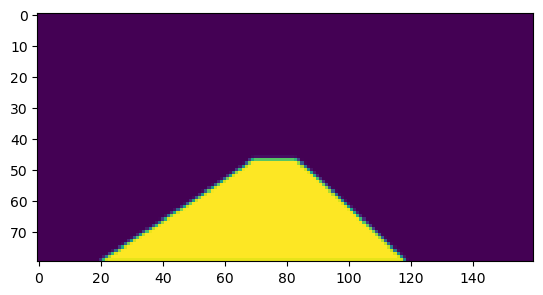

In [8]:
with open("extracted2/full_CNN_labels.p", 'rb') as file:
    loaded_data2 = pickle.load(file)

plt.imshow(loaded_data2[1000])

In [9]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity


In [10]:
def create_model(input_shape, pool_size):
    # Creating neural network here
    model = Sequential()
    # Normalizing incoming inputs
    model.add(BatchNormalization(input_shape=input_shape))

    # Conv Layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))

    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Deconv 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Deconv 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer - only including one channel
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model

In [14]:
initial_learning_rate = 0.001 
def lr_schedule(epoch):
    # learning rate schedule
    if epoch < 11:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1

Epoch 1/20
89/89 [==============================] - 243s 3s/step - loss: 0.0595 - val_loss: 0.0274
Epoch 2/20
89/89 [==============================] - 237s 3s/step - loss: 0.0171 - val_loss: 0.0138
Epoch 3/20
89/89 [==============================] - 234s 3s/step - loss: 0.0122 - val_loss: 0.0105
Epoch 4/20
89/89 [==============================] - 233s 3s/step - loss: 0.0105 - val_loss: 0.0094
Epoch 5/20
89/89 [==============================] - 234s 3s/step - loss: 0.0094 - val_loss: 0.0087
Epoch 6/20
89/89 [==============================] - 236s 3s/step - loss: 0.0088 - val_loss: 0.0084
Epoch 7/20
89/89 [==============================] - 227s 3s/step - loss: 0.0084 - val_loss: 0.0079
Epoch 8/20
89/89 [==============================] - 238s 3s/step - loss: 0.0080 - val_loss: 0.0072
Epoch 9/20
89/89 [==============================] - 227s 3s/step - loss: 0.0075 - val_loss: 0.0065
Epoch 10/20
89/89 [==============================] - 227s 3s/step - loss: 0.0068 - val_loss: 0.0058
Epoch 11/

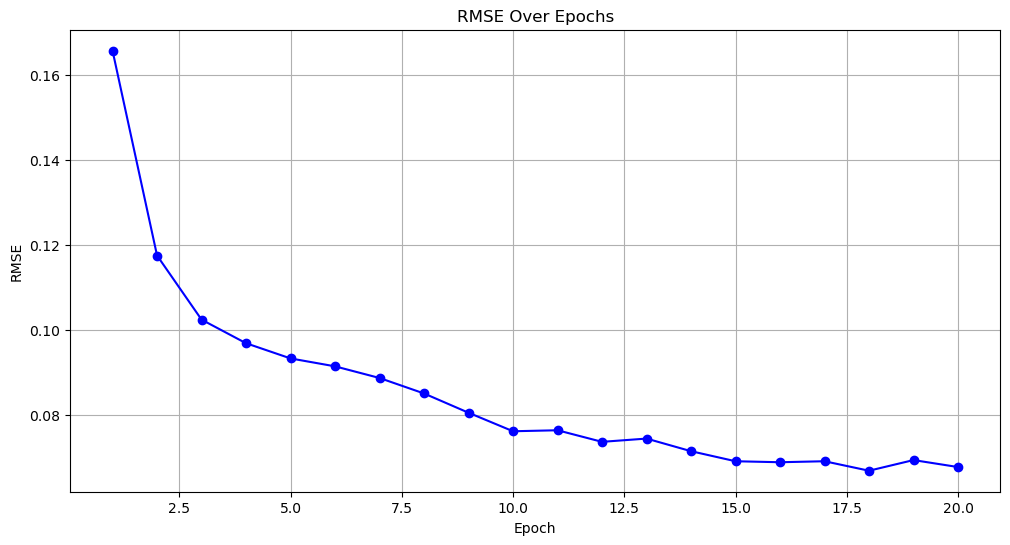

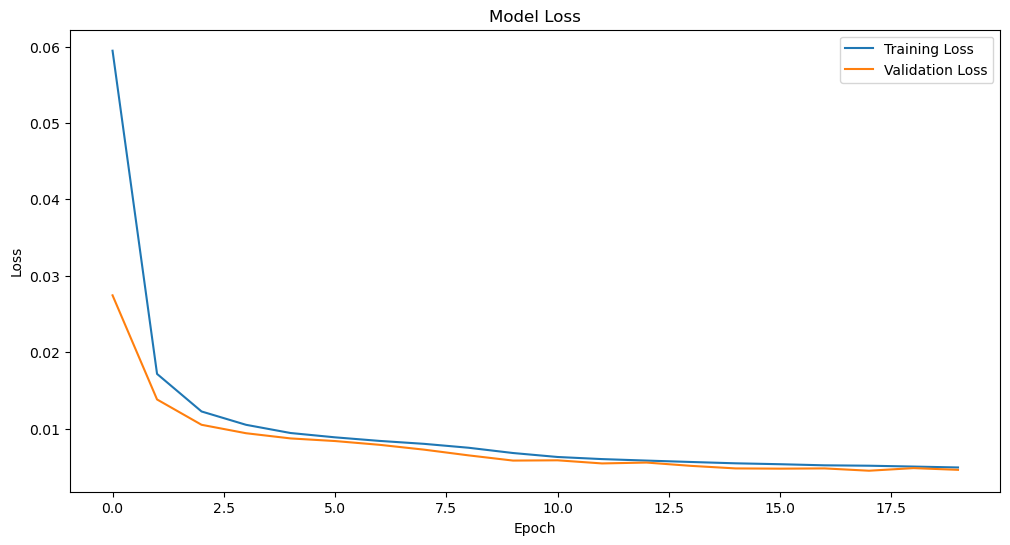

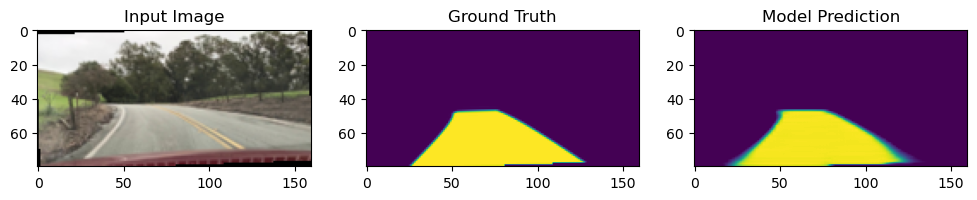

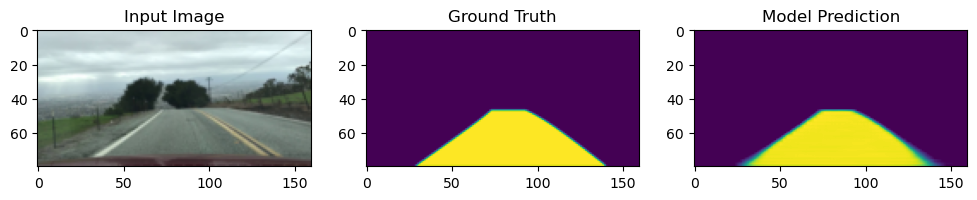

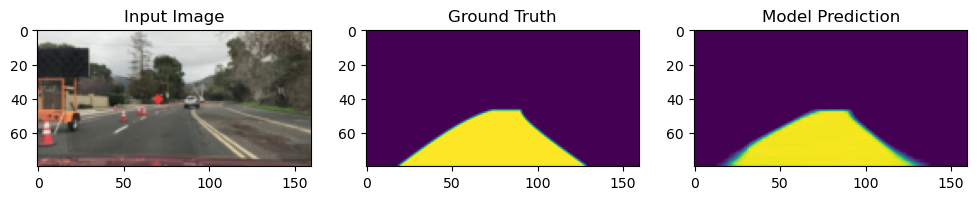

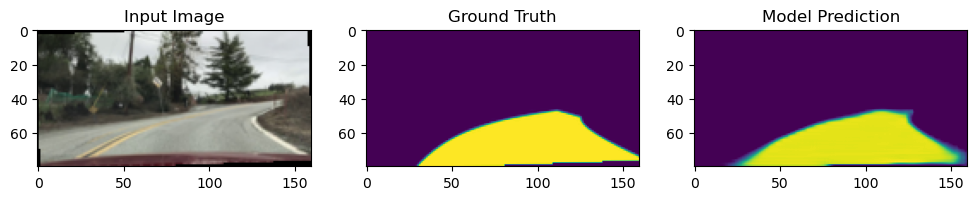

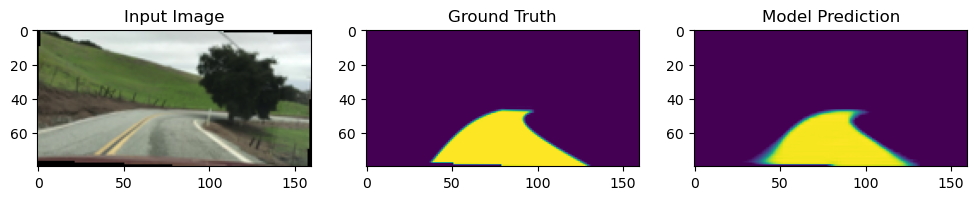

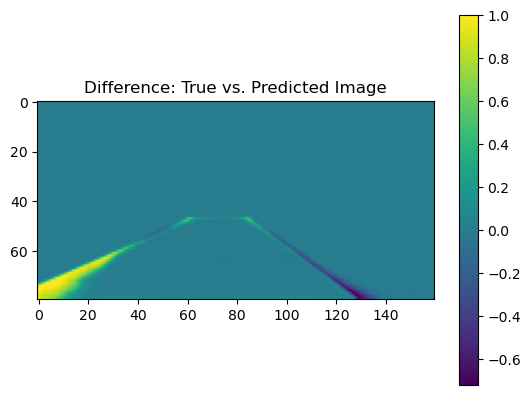

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 80, 160, 3)       12        
 hNormalization)                                                 
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 38, 78, 16)       0         
 2D)                                                             
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout_20 (Dropout)        (None, 36, 76, 16)       

In [15]:
initial_learning_rate = 0.001 
def main():
    # Load training images
    train_images = pickle.load(open("extracted/full_CNN_train.p", "rb" ))

    # Load image labels
    labels = pickle.load(open("extracted2/full_CNN_labels.p", "rb" ))


    train_images = np.array(train_images)
    labels = np.array(labels)

 
    labels = labels / 255

    train_images, labels = shuffle(train_images, labels)
    # Test size 10%
    X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)
    
    # Batch size, epochs and pool size 
    batch_size = 128
    epochs = 20
    pool_size = (2, 2)
    input_shape = X_train.shape[1:]
    

    # Create the neural network
    model = create_model(input_shape, pool_size)

    # Using a generator to help the model use less data
    datagen = ImageDataGenerator(channel_shift_range=0.2)
    datagen.fit(X_train)

    # Implement a learning rate schedule
    lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)
    
    
    # Compiling and training the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate), loss='mean_squared_error')
    # Store the training history for plotting
    history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(X_train) // batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_val, y_val))
                          #   callbacks=[tf.keras.callbacks.CSVLogger('history.csv')])
    
    # Calculate evaluation metrics on the validation set
    y_pred = model.predict(X_val)
    
    y_val_2d = y_val.reshape(y_val.shape[0], -1)
    y_pred_2d = y_pred.reshape(y_pred.shape[0], -1)
    
    # Ensure both arrays have the same data type 
    y_val_2d = y_val_2d.astype(np.float32)
    y_pred_2d = y_pred_2d.astype(np.float32)
    
    rmse = np.sqrt(history.history['val_loss'])
    #rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
    print("RMSE:", rmse)
    psnr = peak_signal_noise_ratio(y_val_2d, y_pred_2d)
    print("PSNR:", psnr)
    
    # Plot RMSE
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(rmse) + 1), rmse, marker='o', linestyle='-', color='b')
    plt.title('RMSE Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()
    
    # Plot the training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # few sample images and their predictions
    num_samples = 5
    for i in range(num_samples):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title('Input Image')
        plt.imshow(X_val[i])
        plt.subplot(1, 3, 2)
        plt.title('Ground Truth')
        plt.imshow(y_val[i])
        plt.subplot(1, 3, 3)
        plt.title('Model Prediction')
        plt.imshow(y_pred[i])
        plt.show()
        
   
 
    true_image = y_val[100][:, :, 0]
    predicted_image = y_pred[100][:, :, 0]
    difference = true_image - predicted_image

    plt.imshow(difference, cmap='viridis')
    plt.title('Difference: True vs. Predicted Image')
    plt.colorbar()
    plt.show()
    
    # Freeze layers since training is done
    model.trainable = False
    model.compile(optimizer='Adam', loss='mean_squared_error')

# Save model architecture and weights
    model.save('extracted3/full_CNN_model.h5')

# Show summary of model
    model.summary()

    
if __name__ == '__main__':
         main()

In [16]:
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/opt/homebrew/bin/ffmpeg"


In [17]:

import cv2
from scipy.ndimage import zoom
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from keras.models import load_model


In [19]:
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image):
    
    small_img = cv2.resize(image, (160, 80))
    small_img = np.array(small_img)
    small_img = small_img[None,:,:,:]

    # Make prediction with the neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to the list for averaging
    lanes.recent_fit.append(prediction)
    # Only use the last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = cv2.resize(lane_drawn, (image.shape[1], image.shape[0]))

    # Convert lane_image to the same data type as the original image
    lane_image = lane_image.astype(image.dtype)

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result


if __name__ == '__main__':
   
    model = load_model('extracted3/full_CNN_model.h5')

    lanes = Lanes()

    vid_output = 'proj_reg_vid2new.mp4' #'proj_reg_vid.mp4'
    clip1 = VideoFileClip("lanes_clip2.mp4") #VideoFileClip("lanes_clip.mp4")
    # Create the clip
    vid_clip = clip1.fl_image(road_lines)
    vid_clip.write_videofile(vid_output, audio=False)


1/1 [==============================] - 0s 228ms/step
Moviepy - Building video proj_reg_vid2new.mp4.
Moviepy - Writing video proj_reg_vid2new.mp4



t:   0%|                                      | 0/429 [00:00<?, ?it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   1%|▏                             | 3/429 [00:00<00:17, 24.38it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   1%|▍                             | 6/429 [00:00<00:21, 19.32it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   2%|▌                             | 8/429 [00:00<00:22, 18.80it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   2%|▋                            | 10/429 [00:00<00:22, 18.62it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   3%|▊                            | 12/429 [00:00<00:22, 18.70it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   3%|▉                            | 14/429 [00:00<00:22, 18.81it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   4%|█                            | 16/429 [00:00<00:22, 18.71it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   4%|█▏                           | 18/429 [00:00<00:22, 18.29it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   5%|█▎                           | 20/429 [00:01<00:22, 17.90it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   5%|█▍                           | 22/429 [00:01<00:23, 17.62it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   6%|█▌                           | 24/429 [00:01<00:23, 17.49it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   6%|█▊                           | 26/429 [00:01<00:22, 17.60it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   7%|█▉                           | 28/429 [00:01<00:22, 17.99it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   7%|██                           | 30/429 [00:01<00:21, 18.34it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   7%|██▏                          | 32/429 [00:01<00:21, 18.38it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   8%|██▎                          | 34/429 [00:01<00:21, 17.99it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   8%|██▍                          | 36/429 [00:01<00:21, 17.97it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   9%|██▌                          | 38/429 [00:02<00:21, 18.16it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   9%|██▋                          | 40/429 [00:02<00:21, 18.51it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  10%|██▊                          | 42/429 [00:02<00:20, 18.63it/s, now=None]

1/1 [==============================] - 0s 70ms/step


t:  10%|██▉                          | 44/429 [00:02<00:26, 14.47it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  11%|███                          | 46/429 [00:02<00:27, 13.90it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  11%|███▏                         | 48/429 [00:02<00:30, 12.62it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  12%|███▍                         | 50/429 [00:03<00:32, 11.55it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  12%|███▌                         | 52/429 [00:03<00:32, 11.64it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  13%|███▋                         | 54/429 [00:03<00:32, 11.62it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  13%|███▊                         | 56/429 [00:03<00:32, 11.36it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  14%|███▉                         | 58/429 [00:03<00:31, 11.67it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  14%|████                         | 60/429 [00:03<00:32, 11.48it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  14%|████▏                        | 62/429 [00:04<00:32, 11.34it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  15%|████▎                        | 64/429 [00:04<00:31, 11.44it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  15%|████▍                        | 66/429 [00:04<00:31, 11.57it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  16%|████▌                        | 68/429 [00:04<00:30, 11.73it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  16%|████▋                        | 70/429 [00:04<00:31, 11.53it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  17%|████▊                        | 72/429 [00:04<00:30, 11.53it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  17%|█████                        | 74/429 [00:05<00:30, 11.81it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  18%|█████▏                       | 76/429 [00:05<00:29, 12.15it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  18%|█████▎                       | 78/429 [00:05<00:29, 11.98it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  19%|█████▍                       | 80/429 [00:05<00:30, 11.45it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  19%|█████▌                       | 82/429 [00:05<00:29, 11.86it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  20%|█████▋                       | 84/429 [00:05<00:29, 11.62it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  20%|█████▊                       | 86/429 [00:06<00:29, 11.76it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  21%|█████▉                       | 88/429 [00:06<00:29, 11.59it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  21%|██████                       | 90/429 [00:06<00:29, 11.49it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  21%|██████▏                      | 92/429 [00:06<00:28, 11.82it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  22%|██████▎                      | 94/429 [00:06<00:27, 12.13it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  22%|██████▍                      | 96/429 [00:06<00:28, 11.62it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  23%|██████▌                      | 98/429 [00:07<00:28, 11.75it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  23%|██████▌                     | 100/429 [00:07<00:27, 12.04it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  24%|██████▋                     | 102/429 [00:07<00:26, 12.12it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  24%|██████▊                     | 104/429 [00:07<00:26, 12.07it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  25%|██████▉                     | 106/429 [00:07<00:27, 11.93it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  25%|███████                     | 108/429 [00:07<00:26, 11.96it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  26%|███████▏                    | 110/429 [00:08<00:26, 12.16it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  26%|███████▎                    | 112/429 [00:08<00:25, 12.31it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  27%|███████▍                    | 114/429 [00:08<00:25, 12.42it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  27%|███████▌                    | 116/429 [00:08<00:26, 11.85it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  28%|███████▋                    | 118/429 [00:08<00:26, 11.81it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  28%|███████▊                    | 120/429 [00:08<00:25, 11.97it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  28%|███████▉                    | 122/429 [00:09<00:25, 12.11it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  29%|████████                    | 124/429 [00:09<00:25, 12.15it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  29%|████████▏                   | 126/429 [00:09<00:25, 12.03it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  30%|████████▎                   | 128/429 [00:09<00:24, 12.28it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  30%|████████▍                   | 130/429 [00:09<00:24, 12.13it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  31%|████████▌                   | 132/429 [00:09<00:24, 12.10it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  31%|████████▋                   | 134/429 [00:10<00:24, 12.02it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  32%|████████▉                   | 136/429 [00:10<00:24, 12.18it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  32%|█████████                   | 138/429 [00:10<00:24, 12.07it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  33%|█████████▏                  | 140/429 [00:10<00:24, 11.71it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  33%|█████████▎                  | 142/429 [00:10<00:24, 11.72it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  34%|█████████▍                  | 144/429 [00:10<00:23, 11.95it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  34%|█████████▌                  | 146/429 [00:11<00:23, 12.16it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  34%|█████████▋                  | 148/429 [00:11<00:22, 12.24it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  35%|█████████▊                  | 150/429 [00:11<00:23, 11.88it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  35%|█████████▉                  | 152/429 [00:11<00:22, 12.04it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  36%|██████████                  | 154/429 [00:11<00:23, 11.84it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  36%|██████████▏                 | 156/429 [00:11<00:22, 12.10it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  37%|██████████▎                 | 158/429 [00:12<00:22, 12.10it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  37%|██████████▍                 | 160/429 [00:12<00:21, 12.26it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  38%|██████████▌                 | 162/429 [00:12<00:21, 12.27it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  38%|██████████▋                 | 164/429 [00:12<00:21, 12.13it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  39%|██████████▊                 | 166/429 [00:12<00:21, 11.98it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  39%|██████████▉                 | 168/429 [00:12<00:21, 12.09it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  40%|███████████                 | 170/429 [00:13<00:21, 12.10it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  40%|███████████▏                | 172/429 [00:13<00:20, 12.25it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  41%|███████████▎                | 174/429 [00:13<00:21, 12.11it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  41%|███████████▍                | 176/429 [00:13<00:20, 12.22it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  41%|███████████▌                | 178/429 [00:13<00:21, 11.85it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  42%|███████████▋                | 180/429 [00:13<00:21, 11.79it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  42%|███████████▉                | 182/429 [00:14<00:21, 11.66it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  43%|████████████                | 184/429 [00:14<00:20, 11.70it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  43%|████████████▏               | 186/429 [00:14<00:21, 11.47it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  44%|████████████▎               | 188/429 [00:14<00:20, 11.57it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  44%|████████████▍               | 190/429 [00:14<00:20, 11.61it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  45%|████████████▌               | 192/429 [00:14<00:20, 11.81it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  45%|████████████▋               | 194/429 [00:15<00:19, 11.84it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  46%|████████████▊               | 196/429 [00:15<00:19, 11.97it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  46%|████████████▉               | 198/429 [00:15<00:19, 11.96it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  47%|█████████████               | 200/429 [00:15<00:19, 11.95it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  47%|█████████████▏              | 202/429 [00:15<00:18, 12.08it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  48%|█████████████▎              | 204/429 [00:15<00:18, 11.89it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  48%|█████████████▍              | 206/429 [00:16<00:18, 11.93it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  48%|█████████████▌              | 208/429 [00:16<00:18, 11.85it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  49%|█████████████▋              | 210/429 [00:16<00:18, 11.72it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  49%|█████████████▊              | 212/429 [00:16<00:18, 12.01it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  50%|█████████████▉              | 214/429 [00:16<00:18, 11.68it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  50%|██████████████              | 216/429 [00:17<00:18, 11.83it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  51%|██████████████▏             | 218/429 [00:17<00:17, 11.84it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  51%|██████████████▎             | 220/429 [00:17<00:17, 12.09it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  52%|██████████████▍             | 222/429 [00:17<00:17, 12.01it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  52%|██████████████▌             | 224/429 [00:17<00:17, 11.89it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  53%|██████████████▊             | 226/429 [00:17<00:16, 11.99it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  53%|██████████████▉             | 228/429 [00:18<00:17, 11.70it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  54%|███████████████             | 230/429 [00:18<00:16, 12.07it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  54%|███████████████▏            | 232/429 [00:18<00:19, 10.21it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  55%|███████████████▎            | 234/429 [00:18<00:18, 10.62it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  55%|███████████████▍            | 236/429 [00:18<00:17, 10.91it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  55%|███████████████▌            | 238/429 [00:18<00:17, 10.97it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  56%|███████████████▋            | 240/429 [00:19<00:16, 11.39it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  56%|███████████████▊            | 242/429 [00:19<00:16, 11.44it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  57%|███████████████▉            | 244/429 [00:19<00:15, 11.86it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  57%|████████████████            | 246/429 [00:19<00:15, 11.90it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  58%|████████████████▏           | 248/429 [00:19<00:14, 12.12it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  58%|████████████████▎           | 250/429 [00:19<00:15, 11.41it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  59%|████████████████▍           | 252/429 [00:20<00:14, 11.88it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  59%|████████████████▌           | 254/429 [00:20<00:14, 11.84it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  60%|████████████████▋           | 256/429 [00:20<00:14, 12.14it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  60%|████████████████▊           | 258/429 [00:20<00:14, 11.97it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  61%|████████████████▉           | 260/429 [00:20<00:14, 11.89it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  61%|█████████████████           | 262/429 [00:20<00:13, 11.95it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  62%|█████████████████▏          | 264/429 [00:21<00:13, 11.90it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  62%|█████████████████▎          | 266/429 [00:21<00:13, 12.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  62%|█████████████████▍          | 268/429 [00:21<00:13, 12.31it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  63%|█████████████████▌          | 270/429 [00:21<00:12, 12.53it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  63%|█████████████████▊          | 272/429 [00:21<00:12, 12.66it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  64%|█████████████████▉          | 274/429 [00:21<00:12, 12.77it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  64%|██████████████████          | 276/429 [00:22<00:12, 12.28it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  65%|██████████████████▏         | 278/429 [00:22<00:12, 12.36it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  65%|██████████████████▎         | 280/429 [00:22<00:11, 12.77it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  66%|██████████████████▍         | 282/429 [00:22<00:11, 13.01it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  66%|██████████████████▌         | 284/429 [00:22<00:11, 13.06it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  67%|██████████████████▋         | 286/429 [00:22<00:11, 12.76it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  67%|██████████████████▊         | 288/429 [00:22<00:10, 12.85it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  68%|██████████████████▉         | 290/429 [00:23<00:10, 12.89it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  68%|███████████████████         | 292/429 [00:23<00:10, 12.99it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  69%|███████████████████▏        | 294/429 [00:23<00:10, 12.47it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  69%|███████████████████▎        | 296/429 [00:23<00:10, 12.56it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  69%|███████████████████▍        | 298/429 [00:23<00:10, 12.77it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  70%|███████████████████▌        | 300/429 [00:23<00:09, 13.06it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  70%|███████████████████▋        | 302/429 [00:24<00:09, 13.33it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  71%|███████████████████▊        | 304/429 [00:24<00:09, 13.42it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  71%|███████████████████▉        | 306/429 [00:24<00:09, 13.04it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  72%|████████████████████        | 308/429 [00:24<00:09, 12.95it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  72%|████████████████████▏       | 310/429 [00:24<00:09, 12.75it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  73%|████████████████████▎       | 312/429 [00:24<00:09, 12.83it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  73%|████████████████████▍       | 314/429 [00:25<00:09, 12.31it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  74%|████████████████████▌       | 316/429 [00:25<00:09, 12.52it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  74%|████████████████████▊       | 318/429 [00:25<00:08, 12.55it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  75%|████████████████████▉       | 320/429 [00:25<00:08, 12.30it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  75%|█████████████████████       | 322/429 [00:25<00:08, 12.56it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  76%|█████████████████████▏      | 324/429 [00:25<00:08, 12.07it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  76%|█████████████████████▎      | 326/429 [00:25<00:08, 12.40it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  76%|█████████████████████▍      | 328/429 [00:26<00:08, 12.35it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  77%|█████████████████████▌      | 330/429 [00:26<00:07, 12.39it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  77%|█████████████████████▋      | 332/429 [00:26<00:07, 12.42it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  78%|█████████████████████▊      | 334/429 [00:26<00:07, 12.74it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  78%|█████████████████████▉      | 336/429 [00:26<00:07, 12.63it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  79%|██████████████████████      | 338/429 [00:26<00:07, 12.58it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  79%|██████████████████████▏     | 340/429 [00:27<00:07, 12.56it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  80%|██████████████████████▎     | 342/429 [00:27<00:06, 12.85it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  80%|██████████████████████▍     | 344/429 [00:27<00:06, 12.76it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  81%|██████████████████████▌     | 346/429 [00:27<00:06, 12.97it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  81%|██████████████████████▋     | 348/429 [00:27<00:06, 12.69it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  82%|██████████████████████▊     | 350/429 [00:27<00:06, 12.62it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  82%|██████████████████████▉     | 352/429 [00:28<00:06, 12.62it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  83%|███████████████████████     | 354/429 [00:28<00:05, 12.69it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  83%|███████████████████████▏    | 356/429 [00:28<00:05, 12.48it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  83%|███████████████████████▎    | 358/429 [00:28<00:05, 12.45it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  84%|███████████████████████▍    | 360/429 [00:28<00:05, 12.48it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  84%|███████████████████████▋    | 362/429 [00:28<00:05, 12.43it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  85%|███████████████████████▊    | 364/429 [00:29<00:05, 12.54it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  85%|███████████████████████▉    | 366/429 [00:29<00:05, 12.42it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  86%|████████████████████████    | 368/429 [00:29<00:04, 12.57it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  86%|████████████████████████▏   | 370/429 [00:29<00:04, 12.55it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  87%|████████████████████████▎   | 372/429 [00:29<00:04, 12.35it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  87%|████████████████████████▍   | 374/429 [00:29<00:04, 12.59it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  88%|████████████████████████▌   | 376/429 [00:29<00:04, 12.60it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  88%|████████████████████████▋   | 378/429 [00:30<00:04, 12.50it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  89%|████████████████████████▊   | 380/429 [00:30<00:03, 12.54it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  89%|████████████████████████▉   | 382/429 [00:30<00:03, 12.58it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  90%|█████████████████████████   | 384/429 [00:30<00:03, 12.28it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  90%|█████████████████████████▏  | 386/429 [00:30<00:03, 12.41it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  90%|█████████████████████████▎  | 388/429 [00:31<00:03, 10.61it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  91%|█████████████████████████▍  | 390/429 [00:31<00:03, 11.06it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  91%|█████████████████████████▌  | 392/429 [00:31<00:03, 11.41it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  92%|█████████████████████████▋  | 394/429 [00:31<00:02, 11.71it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  92%|█████████████████████████▊  | 396/429 [00:31<00:02, 11.82it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  93%|█████████████████████████▉  | 398/429 [00:31<00:02, 11.62it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  93%|██████████████████████████  | 400/429 [00:32<00:02, 12.07it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  94%|██████████████████████████▏ | 402/429 [00:32<00:02, 12.22it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  94%|██████████████████████████▎ | 404/429 [00:32<00:02, 12.28it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  95%|██████████████████████████▍ | 406/429 [00:32<00:01, 12.59it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  95%|██████████████████████████▋ | 408/429 [00:32<00:01, 12.78it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  96%|██████████████████████████▊ | 410/429 [00:32<00:01, 12.54it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  96%|██████████████████████████▉ | 412/429 [00:32<00:01, 12.40it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  97%|███████████████████████████ | 414/429 [00:33<00:01, 12.44it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  97%|███████████████████████████▏| 416/429 [00:33<00:01, 12.66it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  97%|███████████████████████████▎| 418/429 [00:33<00:00, 12.84it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  98%|███████████████████████████▍| 420/429 [00:33<00:00, 12.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  98%|███████████████████████████▌| 422/429 [00:33<00:00, 12.83it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  99%|███████████████████████████▋| 424/429 [00:33<00:00, 13.13it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  99%|███████████████████████████▊| 426/429 [00:34<00:00, 13.06it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t: 100%|███████████████████████████▉| 428/429 [00:34<00:00, 12.48it/s, now=None]

1/1 [==============================] - 0s 35ms/step


Moviepy - Done !
Moviepy - video ready proj_reg_vid2new.mp4


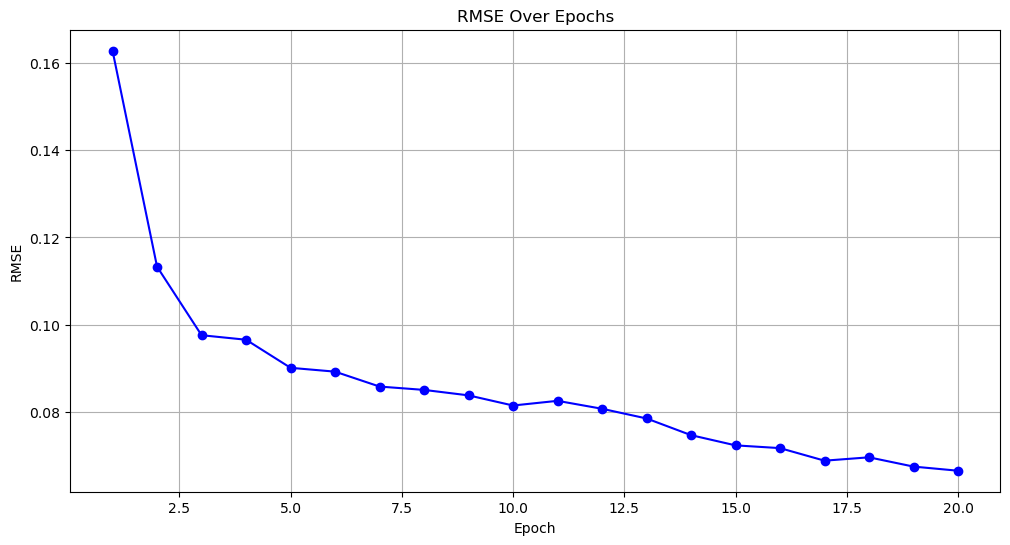

In [16]:
rmse = [0.16274704, 0.11331778, 0.09763396, 0.09660065, 0.09017273, 0.08929487,
 0.08588387, 0.08511746, 0.08386695, 0.08154369, 0.08261469, 0.08079856,
 0.07858442, 0.07476257, 0.07242427, 0.07179277, 0.06891855, 0.06968733,
 0.06756589, 0.06661973]
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(rmse) + 1), rmse, marker='o', linestyle='-', color='b')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [ ]:
""""
    # Scatter plot of predicted vs. ground truth values
    #y_val_colors = ['blue'] * len(y_val)
    #y_pred_colors = ['red'] * len(y_pred)
    plt.figure()
    indices = np.random.choice(y_val.shape[0], 1000, replace=False)
    plt.scatter(y_val[indices], c='blue')
    plt.scatter(y_pred[indices], c='red')
    plt.title('Scatter Plot: Predicted vs. Ground Truth')
    plt.xlabel('Ground Truth')
    plt.ylabel('Predicted')
    plt.show()
    # Scatter plot of predicted vs. ground truth values
    plt.scatter(y_val, y_pred, c='blue', label='Ground Truth', alpha=0.5)
    plt.scatter(y_val, y_val, c='red', label='Predicted', alpha=0.5)
    plt.title('Scatter Plot: Predicted vs. Ground Truth')
    plt.xlabel('Ground Truth')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.scatter(x=X_val, y=y_val,color='black')  #The X-Features vs. The Real Label
    plt.plot(X_val, y_pred,color='blue') #The X- Features vs. The predicted label
    plt.show()
     #Plot the difference between the true and predicted values 
    #plt.plot(y_val - y_pred, marker='o',linestyle='')
    """